# settings

In [6]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import pearsonr
from scipy.io import savemat
from utils import daily_blocks, extract_all_licks, get_tone_response_df, block_stim_evoke_response

plt.rcParams['axes.facecolor'] = 'white'
outcome_list = ['Hit', 'Miss', 'FA', 'CR']
mouse_names = ['jl009', 'fz017', 'fz009', 'fz006']
data_paths = ["Z:/Jenni/jl009/behavimaging.mat",
             "W:/Jenni/fz017/behavimaging.mat",
             "Y:/Jenni/fz009/behavimaging.mat",
             "Y:/sarah/fz006/behavimaging.mat"]
disks = ['Z', 'W', 'Y', 'Y']

mouse_id = 0
mouse_name = mouse_names[mouse_id]
disk = disks[mouse_id]

data_path = "{}_behavimaging.mat".format(mouse_name)
mat = scipy.io.loadmat(data_path)
data = mat['behavimaging']
nBlocks = data.shape[-1]
nDays = data[0, -1]['day'][0][0]

In [127]:
plt.rcParams.update({'font.size': 16})

# average response with/without prelick

## single image

(72, 175, 90)
(78, 175, 90)
(69, 175, 90)
(81, 175, 90)


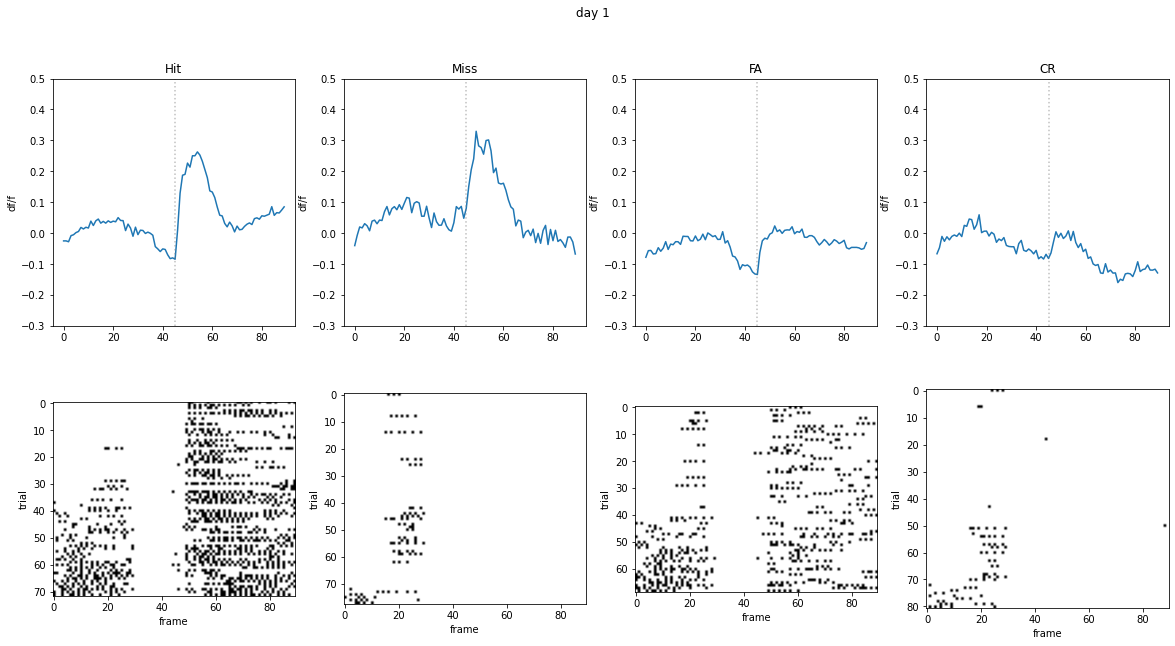

In [7]:
day = 1
iblocks = daily_blocks(data, day)
plt.figure(figsize=(20, 10))
if len(iblocks)>0:
    daily_cues = []
    daily_outcomes = []
    daily_responses = []
    daily_firstlicks = []
    daily_alllicks = []
    for i in iblocks:
        block = data[0, i]
        # normalize doesn't have much effect on the result, so set it to False
        cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False, window=[45,45])
        daily_cues.append(cues)
        daily_outcomes.append(outcomes)
        daily_responses.append(stim_resp)
        daily_firstlicks.append(firstlicks)
        daily_alllicks.append(alllicks)

    daily_cues = np.hstack(daily_cues)
    daily_outcomes = np.hstack(daily_outcomes)
    daily_responses = np.vstack(daily_responses)
    daily_firstlicks = np.hstack(daily_firstlicks)
    daily_alllicks = np.vstack(daily_alllicks)

#         print('day {} spk shape: {}'.format(day, daily_responses.shape))
#         print('day {} behavior shape: {}'.format(day, daily_outcomes.shape))
#         print('day {} alllick shape: {}'.format(day, daily_alllicks.shape))

    NN = daily_responses.shape[1]

    # from scipy.stats import pearsonr
    daily_spks = daily_responses.transpose(1, 0, 2)
    daily_spks = daily_spks.reshape(NN, -1)
    avg_resp = np.mean(daily_spks, axis=0) # ntrials x 75
    for outcome_index in range(1,5):
        # hit responses
        ioutcome = np.where(daily_outcomes == outcome_index)[0]
        resp = daily_responses[ioutcome]
        NT = resp.shape[-1]
        print(resp.shape)

        lick = daily_alllicks[ioutcome]
        n_prelicks = np.sum(lick[:, :15], axis=1)
        lick_idx = np.where(n_prelicks != 0)[0]
        resp_lick = resp[lick_idx].reshape(-1, NT)
        resp_lick = np.mean(resp_lick, axis=0)
        nolick_idx = np.where(n_prelicks == 0)[0]
        resp_nolick = resp[nolick_idx].reshape(-1, NT)
        resp_nolick = np.mean(resp_nolick, axis=0)
        lick_sort = np.argsort(n_prelicks)
        lick = lick[lick_sort]

        resp = resp.reshape(-1, NT)
        all_resp = np.mean(resp, axis=0)

        plt.subplot(2,4,outcome_index)
        x = np.arange(NT)
        y = (resp_lick+resp_nolick)/2
        plt.plot(x, y)
        # plt.plot(x, resp_lick, label='with pre lick')
        # plt.plot(x, resp_nolick, label='no pre lick')
        plt.ylim([-0.3, 0.5])
        # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
        plt.title(outcome_list[outcome_index-1])
        # plt.legend()
        plt.axvline(45, color='gray', linestyle=":", alpha=0.5)
        plt.ylabel('df/f')
        plt.subplot(2,4,4+outcome_index)
        plt.imshow(lick, cmap='binary')
        plt.xlabel('frame')
        plt.ylabel('trial')
    plt.suptitle('day {}'.format(day))
    plt.show()

## all

In [8]:
day = 1
for day in range(1, nDays+1):
    iblocks = daily_blocks(data, day)
    plt.figure(figsize=(20, 10))
    if len(iblocks)>0:
        daily_cues = []
        daily_outcomes = []
        daily_responses = []
        daily_firstlicks = []
        daily_alllicks = []
        for i in iblocks:
            block = data[0, i]
            # normalize doesn't have much effect on the result, so set it to False
            cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False, remove=True)
            daily_cues.append(cues)
            daily_outcomes.append(outcomes)
            daily_responses.append(stim_resp)
            daily_firstlicks.append(firstlicks)
            daily_alllicks.append(alllicks)

        daily_cues = np.hstack(daily_cues)
        daily_outcomes = np.hstack(daily_outcomes)
        daily_responses = np.vstack(daily_responses)
        daily_firstlicks = np.hstack(daily_firstlicks)
        daily_alllicks = np.vstack(daily_alllicks)

    #         print('day {} spk shape: {}'.format(day, daily_responses.shape))
    #         print('day {} behavior shape: {}'.format(day, daily_outcomes.shape))
    #         print('day {} alllick shape: {}'.format(day, daily_alllicks.shape))

        NN = daily_responses.shape[1]

        # from scipy.stats import pearsonr
        daily_spks = daily_responses.transpose(1, 0, 2)
        daily_spks = daily_spks.reshape(NN, -1)
        avg_resp = np.mean(daily_spks, axis=0) # ntrials x 75
        for outcome_index in range(1,5):
            # hit responses
            ioutcome = np.where(daily_outcomes == outcome_index)[0]
            resp = daily_responses[ioutcome]
            NT = resp.shape[-1]
            print(resp.shape)

            lick = daily_alllicks[ioutcome]
            n_prelicks = np.sum(lick[:, :15], axis=1)
            lick_idx = np.where(n_prelicks != 0)[0]
            resp_lick = resp[lick_idx].reshape(-1, NT)
            resp_lick = np.mean(resp_lick, axis=0)
            nolick_idx = np.where(n_prelicks == 0)[0]
            resp_nolick = resp[nolick_idx].reshape(-1, NT)
            resp_nolick = np.mean(resp_nolick, axis=0)
            lick_sort = np.argsort(n_prelicks)
            lick = lick[lick_sort]

            resp = resp.reshape(-1, NT)
            all_resp = np.mean(resp, axis=0)

            plt.subplot(2,4,outcome_index)
            x = np.arange(NT)
            plt.plot(x, resp_lick, label='with pre lick')
            plt.plot(x, resp_nolick, label='no pre lick')
            plt.ylim([-0.3, 0.5])
            # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
            plt.title(outcome_list[outcome_index-1])
            plt.legend()
            plt.ylabel('df/f')
            plt.subplot(2,4,4+outcome_index)
            plt.imshow(lick, cmap='binary')
            plt.xlabel('frame')
            plt.ylabel('trial')
        plt.suptitle('day {}'.format(day))
        # plt.show()
        fig_save_path = os.path.join('figures',  'zscore-avg_stim-evoke-response-prelickornot_{}_day-{}'.format(mouse_name, day))
        plt.savefig(fig_save_path, dpi=100)
        plt.close()

remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
remove 34/100 trials with window size 20
(72, 175, 75)
(61, 175, 75)
(69, 175, 75)
(64, 175, 75)
remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
(90, 141, 75)
(60, 141, 75)
(82, 141, 75)
(68, 141, 75)
remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
remove 37/100 trials with window size 20
(104, 205, 75)
(27, 205, 75)
(69, 205, 75)
(63, 205, 75)
remove 0/100 trials with window size 20
remove 49/100 trials with window size 20
(66, 139, 75)
(12, 139, 75)
(51, 139, 75)
(22, 139, 75)
remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
(98, 158, 75)
(2, 158, 75)
(77, 158, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(23, 158, 75)
remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
remove 23/100 trials with window size 20
(130, 169, 75)
(9, 169, 75)
(102, 169, 75)
(36, 169, 75)
remove 0/100 trials with window size 20
remove 44/100 trials with window size 20
(72, 171, 75)
(8, 171, 75)
(50, 171, 75)
(26, 171, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


remove 0/100 trials with window size 20
remove 54/100 trials with window size 20
(63, 187, 75)
(12, 187, 75)
(47, 187, 75)
(24, 187, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
(127, 198, 75)
(23, 198, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(89, 198, 75)
(61, 198, 75)
remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
remove 64/100 trials with window size 20
(113, 180, 75)
(7, 180, 75)
(56, 180, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(60, 180, 75)


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

# axon activity

## order by lick response

### single image

remove 0/100 trials with window size 20
remove 26/100 trials with window size 20
remove 0/100 trials with window size 20


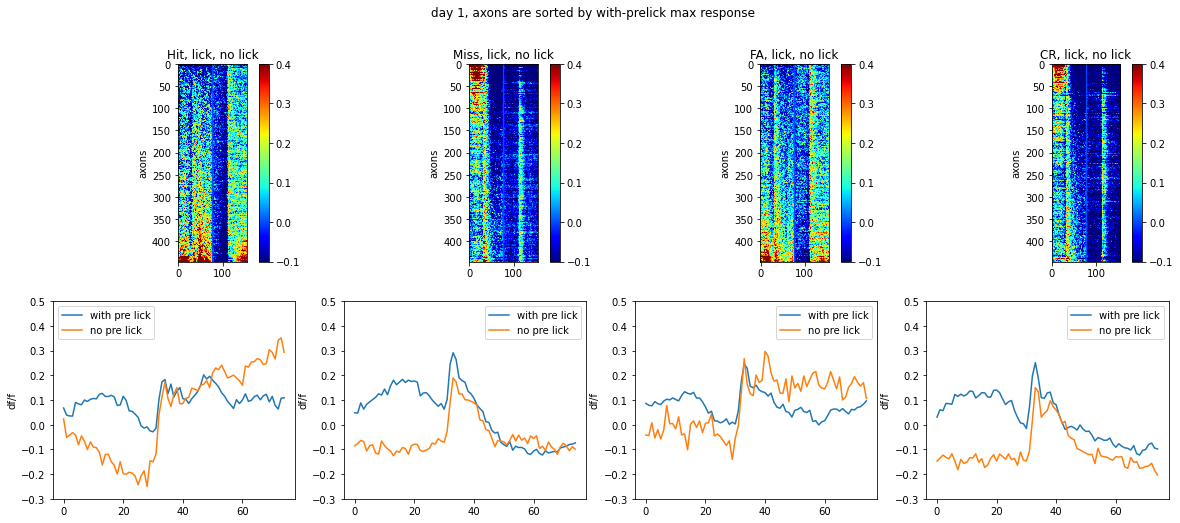

In [17]:
from utils import daily_blocks, block_stim_evoke_response
day = 1
# for day in range(1, nDays+1):
iblocks = daily_blocks(data, day)
if len(iblocks)>0:
    daily_cues = []
    daily_outcomes = []
    daily_responses = []
    daily_firstlicks = []
    daily_alllicks = []
    for i in iblocks:
        block = data[0, i]
        # zscore
        cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False, remove=True)
        # without zscore
        # cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=False)
        daily_cues.append(cues)
        daily_outcomes.append(outcomes)
        daily_responses.append(stim_resp)
        daily_firstlicks.append(firstlicks)
        daily_alllicks.append(alllicks)

    daily_cues = np.hstack(daily_cues)
    daily_outcomes = np.hstack(daily_outcomes)
    daily_responses = np.vstack(daily_responses)
    daily_firstlicks = np.hstack(daily_firstlicks)
    daily_alllicks = np.vstack(daily_alllicks)

    NN = daily_responses.shape[1]

    outcome_index = 1
    plt.figure(figsize=(20,8))
    for outcome_index in range(1,5):
        all_resp = np.zeros((NN, 75*2+5))
        ioutcome = np.where(daily_outcomes == outcome_index)[0]
        oresp = daily_responses[ioutcome]

        lick = daily_alllicks[ioutcome] 
        n_prelicks = np.sum(lick[:, :15], axis=1)
        lick_idx = np.where(n_prelicks != 0)[0] # with prelick
        resp = oresp[lick_idx]
        resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)

        isort = np.argsort(resp[:, 30:].sum(axis=1)) # sort by pre lick frequency
        all_resp[:, :75] = resp[isort]

        nolick_idx = np.where(n_prelicks == 0)[0] # without prelick
        resp = oresp[nolick_idx]
        resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
        all_resp[:, (75+5):] = resp[isort]

        plt.subplot(2,4,outcome_index)
        x = np.arange(NT)
        plt.imshow(all_resp, cmap='jet', vmin=-0.1, vmax=0.4)
        plt.ylabel('axons')
        plt.colorbar()
        # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
        plt.title('{}, lick, no lick'.format(outcome_list[outcome_index-1]))
        plt.subplot(2,4,4+outcome_index)

        resp_lick = oresp[lick_idx].reshape(-1, NT)
        resp_lick = np.mean(resp_lick, axis=0)
        resp_nolick = resp[nolick_idx].reshape(-1, NT)
        resp_nolick = np.mean(resp_nolick, axis=0)

        x = np.arange(NT)
        plt.plot(x, resp_lick, label='with pre lick')
        plt.plot(x, resp_nolick, label='no pre lick')
        plt.ylim([-0.3, 0.5])
        # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
        # plt.title(outcome_list[outcome_index-1])
        plt.legend()
        plt.ylabel('df/f')
    plt.suptitle('day {}, axons are sorted by with-prelick max response'.format(day))
    plt.show()
        # fig_save_path = os.path.join('figures',  'stim-evoke-response-prelickornot_{}_day-{}'.format(mouse_name, day))
        # plt.savefig(fig_save_path, dpi=100)
        # plt.close()

### all

C:\Users\fdu5\AppData\Local\Temp\75/ipykernel_32212/2980730077.py:40: RuntimeWarning: Mean of empty slice.
  resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\fdu5\AppData\Local\Temp\75/ipykernel_32212/2980730077.py:47: RuntimeWarning: Mean of empty slice.
  resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fdu5\AppData\Local\Temp\75/ipykernel_32212/2980730077.py:40: RuntimeWarning: Mean of empty slice.
  resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:1

IndexError: index 77 is out of bounds for axis 0 with size 76

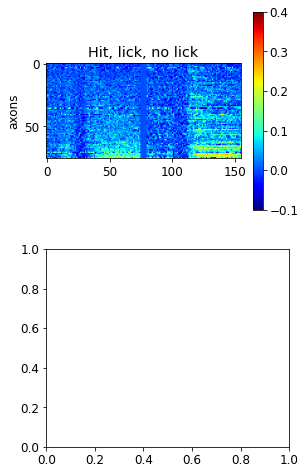

In [257]:
from utils import daily_blocks, block_stim_evoke_response
day = 1
for day in range(1, nDays+1):
    iblocks = daily_blocks(data, day)
    if len(iblocks)>0:
        daily_cues = []
        daily_outcomes = []
        daily_responses = []
        daily_firstlicks = []
        daily_alllicks = []
        for i in iblocks:
            block = data[0, i]
            # normalize doesn't have much effect on the result, so set it to False
            cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=False)
            daily_cues.append(cues)
            daily_outcomes.append(outcomes)
            daily_responses.append(stim_resp)
            daily_firstlicks.append(firstlicks)
            daily_alllicks.append(alllicks)

        daily_cues = np.hstack(daily_cues)
        daily_outcomes = np.hstack(daily_outcomes)
        daily_responses = np.vstack(daily_responses)
        daily_firstlicks = np.hstack(daily_firstlicks)
        daily_alllicks = np.vstack(daily_alllicks)

        NN = daily_responses.shape[1]

        outcome_index = 1
        plt.figure(figsize=(20,8))
        for outcome_index in range(1,5):
            all_resp = np.zeros((NN, 75*2+5))
            ioutcome = np.where(daily_outcomes == outcome_index)[0]
            oresp = daily_responses[ioutcome]

            lick = daily_alllicks[ioutcome] 
            n_prelicks = np.sum(lick[:, :15], axis=1)
            lick_idx = np.where(n_prelicks != 0)[0] # with prelick
            resp = oresp[lick_idx]
            resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)

            isort = np.argsort(resp[:, 30:].sum(axis=1)) # sort by pre lick frequency
            all_resp[:, :75] = resp[isort]

            nolick_idx = np.where(n_prelicks == 0)[0] # without prelick
            resp = oresp[nolick_idx]
            resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
            all_resp[:, (75+5):] = resp[isort]

            plt.subplot(2,4,outcome_index)
            x = np.arange(NT)
            plt.imshow(all_resp, cmap='jet', vmin=-0.1, vmax=0.4)
            plt.ylabel('axons')
            plt.colorbar()
            # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
            plt.title('{}, lick, no lick'.format(outcome_list[outcome_index-1]))
            plt.subplot(2,4,4+outcome_index)

            resp_lick = oresp[lick_idx].reshape(-1, NT)
            resp_lick = np.mean(resp_lick, axis=0)
            resp_nolick = resp[nolick_idx].reshape(-1, NT)
            resp_nolick = np.mean(resp_nolick, axis=0)

            x = np.arange(NT)
            plt.plot(x, resp_lick, label='with pre lick')
            plt.plot(x, resp_nolick, label='no pre lick')
            plt.ylim([-0.1, 0.15])
            # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
            # plt.title(outcome_list[outcome_index-1])
            plt.legend()
            plt.ylabel('df/f')
        plt.suptitle('day {}, axons are sorted by with-prelick max response'.format(day))
        # plt.show()
        fig_save_path = os.path.join('figures',  'zscore-stim-evoke-response-prelickornot_{}_day-{}'.format(mouse_name, day))
        plt.savefig(fig_save_path, dpi=100)
        plt.close()

## sorted by GLM

### Single image 

remove 0/100 trials with window size 20
remove 26/100 trials with window size 20
remove 0/100 trials with window size 20
nmin 200
0.03717374801635742
2.518552541732788
2.658984661102295
2.658984661102295
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.01s     0        0.0112      2
0.05s    10        0.0613      4
0.11s    20        0.0801      8
0.16s    30        0.1144      18
0.20s    40        0.1443      28
0.25s    50        0.1460      28
0.28s   final      0.1461
0.28s upsampled    0.1461


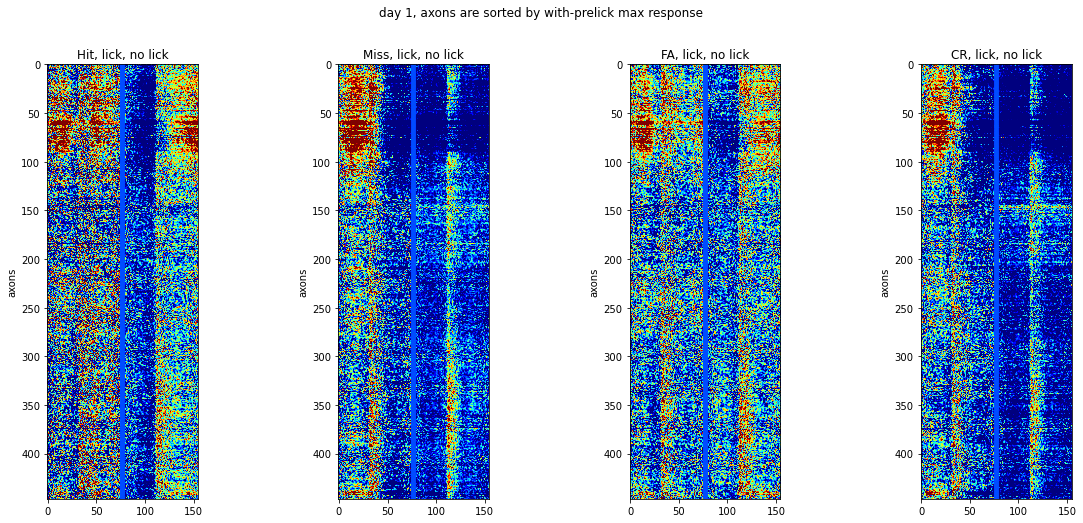

In [11]:
from utils import daily_blocks, block_stim_evoke_response
from rastermap import Rastermap
model = Rastermap(n_components=1, n_X=30, nPC=200, init='pca')
day = 1
# for day in range(1, nDays+1):
iblocks = daily_blocks(data, day)
if len(iblocks)>0:
    daily_cues = []
    daily_outcomes = []
    daily_responses = []
    daily_firstlicks = []
    daily_alllicks = []
    for i in iblocks:
        block = data[0, i]
        # zscore
        cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False, remove=True)
        # without zscore
        # cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=False)
        daily_cues.append(cues)
        daily_outcomes.append(outcomes)
        daily_responses.append(stim_resp)
        daily_firstlicks.append(firstlicks)
        daily_alllicks.append(alllicks)

    daily_cues = np.hstack(daily_cues)
    daily_outcomes = np.hstack(daily_outcomes)
    daily_responses = np.vstack(daily_responses)
    daily_firstlicks = np.hstack(daily_firstlicks)
    daily_alllicks = np.vstack(daily_alllicks)

    NN = daily_responses.shape[1]
    sp = daily_responses.transpose(1, 0, 2)
    sp = sp.reshape(len(sp), -1)
    model.fit(sp)
    isort = model.isort

    outcome_index = 1
    plt.figure(figsize=(20,8))
    for outcome_index in range(1,5):
        all_resp = np.zeros((NN, 75*2+5))
        ioutcome = np.where(daily_outcomes == outcome_index)[0]
        oresp = daily_responses[ioutcome]

        lick = daily_alllicks[ioutcome] 
        n_prelicks = np.sum(lick[:, :15], axis=1)
        lick_idx = np.where(n_prelicks != 0)[0] # with prelick
        resp = oresp[lick_idx]
        resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)

        # isort = np.argsort(resp[:, 30:].sum(axis=1)) # sort by pre lick frequency
        all_resp[:, :75] = resp[isort]

        nolick_idx = np.where(n_prelicks == 0)[0] # without prelick
        resp = oresp[nolick_idx]
        resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
        all_resp[:, (75+5):] = resp[isort]

        plt.subplot(1,4,outcome_index)
        plt.imshow(all_resp, cmap='jet', vmin=-0.1, vmax=0.4)
        plt.ylabel('axons')
        # plt.colorbar()
        # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
        plt.title('{}, lick, no lick'.format(outcome_list[outcome_index-1]))
    plt.suptitle('day {}, axons are sorted by with-prelick max response'.format(day))
    plt.show()
        # fig_save_path = os.path.join('figures',  'stim-evoke-response-prelickornot_{}_day-{}'.format(mouse_name, day))
        # plt.savefig(fig_save_path, dpi=100)
        # plt.close()

### all

In [12]:
from utils import daily_blocks, block_stim_evoke_response
day = 1
for day in range(1, nDays+1):
    iblocks = daily_blocks(data, day)
    if len(iblocks)>0:
        daily_cues = []
        daily_outcomes = []
        daily_responses = []
        daily_firstlicks = []
        daily_alllicks = []
        for i in iblocks:
            block = data[0, i]
            # normalize doesn't have much effect on the result, so set it to False
            cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False, remove=True)
            daily_cues.append(cues)
            daily_outcomes.append(outcomes)
            daily_responses.append(stim_resp)
            daily_firstlicks.append(firstlicks)
            daily_alllicks.append(alllicks)

        daily_cues = np.hstack(daily_cues)
        daily_outcomes = np.hstack(daily_outcomes)
        daily_responses = np.vstack(daily_responses)
        daily_firstlicks = np.hstack(daily_firstlicks)
        daily_alllicks = np.vstack(daily_alllicks)

        NN = daily_responses.shape[1]
        sp = daily_responses.transpose(1, 0, 2)
        sp = sp.reshape(len(sp), -1)
        model.fit(sp)
        isort = model.isort

        outcome_index = 1
        plt.figure(figsize=(20,8))
        for outcome_index in range(1,5):
            all_resp = np.zeros((NN, 75*2+5))
            ioutcome = np.where(daily_outcomes == outcome_index)[0]
            oresp = daily_responses[ioutcome]

            lick = daily_alllicks[ioutcome] 
            n_prelicks = np.sum(lick[:, :15], axis=1)
            lick_idx = np.where(n_prelicks != 0)[0] # with prelick
            resp = oresp[lick_idx]
            resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)

            # isort = np.argsort(resp[:, 30:].sum(axis=1)) # sort by pre lick frequency
            all_resp[:, :75] = resp[isort]

            nolick_idx = np.where(n_prelicks == 0)[0] # without prelick
            resp = oresp[nolick_idx]
            resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
            all_resp[:, (75+5):] = resp[isort]

            plt.subplot(1,4,outcome_index)
            plt.imshow(all_resp, cmap='jet', vmin=-0.1, vmax=0.4)
            plt.ylabel('axons')
            # plt.colorbar()
            # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
            plt.title('{}, lick, no lick'.format(outcome_list[outcome_index-1]))
        plt.suptitle('day {}, axons are sorted by with-prelick max response'.format(day))
        # plt.show()
        fig_save_path = os.path.join('figures',  'GLM-zscore-stim-evoke-response-prelickornot_{}_day-{}'.format(mouse_name, day))
        plt.savefig(fig_save_path, dpi=100)
        plt.close()

remove 0/100 trials with window size 20
remove 26/100 trials with window size 20
remove 0/100 trials with window size 20
nmin 200
0.03900885581970215
3.1155223846435547
3.257962942123413
3.2609641551971436
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0108      2
0.05s    10        0.0616      4
0.09s    20        0.0791      8
0.15s    30        0.1136      18
0.20s    40        0.1472      28
0.25s    50        0.1476      28
0.29s   final      0.1476
0.29s upsampled    0.1476
remove 0/100 trials with window size 20
remove 20/100 trials with window size 20
remove 95/100 trials with window size 20
nmin 200
0.02300572395324707
1.6492204666137695
1.7672276496887207
1.7702271938323975
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0113      2
0.05s    10        0.0605      4
0.08s    20        0.0779      8
0.13s    30        0.1118      18
0.17s    40        0.1463      28
0.21s    50        0.1476      28
0.25s   final 

C:\Users\fdu5\AppData\Local\Temp\90/ipykernel_99764/1699745621.py:44: RuntimeWarning: Mean of empty slice.
  resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\fdu5\AppData\Local\Temp\90/ipykernel_99764/1699745621.py:51: RuntimeWarning: Mean of empty slice.
  resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)


remove 56/100 trials with window size 20
remove 73/100 trials with window size 20
nmin 75
0.0060002803802490234
0.2057332992553711
0.21386265754699707
0.21386265754699707
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.01s     0        0.0350      2
0.04s    10        0.0845      4
0.12s    20        0.1164      8
0.16s    30        0.1725      18
0.21s    40        0.2176      28
0.24s    50        0.2181      28
0.32s   final      0.2181
0.32s upsampled    0.2181
remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
nmin 75
0.008002519607543945
0.3708822727203369
0.38788723945617676
0.3888871669769287
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0269      2
0.03s    10        0.0583      4
0.10s    20        0.1038      8
0.13s    30        0.1900      18
0.20s    40        0.2648      28
0.23s    50        0.2704      28
0.30s   final      0.2706
0.30s upsampled    0.2706
remove 0/100 trials with window size 2

C:\Users\fdu5\AppData\Local\Temp\90/ipykernel_99764/1699745621.py:44: RuntimeWarning: Mean of empty slice.
  resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
nmin 75
0.039220571517944336
1.9555258750915527
1.990534782409668
1.9925358295440674
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0280      2
0.03s    10        0.1357      4
0.07s    20        0.1727      8
0.10s    30        0.2345      18
0.13s    40        0.2812      28
0.18s    50        0.2833      28
0.20s   final      0.2837
0.21s upsampled    0.2837
remove 0/100 trials with window size 20
remove 48/100 trials with window size 20
nmin 75
0.017143964767456055
0.38983845710754395
0.4088447093963623
0.410844087600708
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0278      2
0.04s    10        0.1023      4
0.07s    20        0.1422      8
0.15s    30        0.2151      18
0.18s    40        0.2713      28
0.26s    50        0.2734      28
0.29s   final      0.2736
0.29s upsampled    0.2736


C:\Users\fdu5\AppData\Local\Temp\90/ipykernel_99764/1699745621.py:44: RuntimeWarning: Mean of empty slice.
  resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


remove 0/100 trials with window size 20
remove 99/100 trials with window size 20
nmin 75
0.010057210922241211
0.21200799942016602
0.2210102081298828
0.22201061248779297
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0304      2
0.03s    10        0.0713      4
0.06s    20        0.1107      8
0.13s    30        0.1846      18
0.16s    40        0.2458      28
0.23s    50        0.2479      28
0.26s   final      0.2480
0.26s upsampled    0.2480
remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
remove 99/100 trials with window size 20
nmin 75
0.006048917770385742
0.06139779090881348
0.13984322547912598
0.1458454132080078
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.01s     0        0.0296      2
0.04s    10        0.0673      4
0.06s    20        0.1189      8
0.08s    30        0.2316      18
0.10s    40        0.3327      28
0.12s    50        0.3328      28
0.13s   final      0.3329
0.13s upsampled    0.332

C:\Users\fdu5\AppData\Local\Temp\90/ipykernel_99764/1699745621.py:44: RuntimeWarning: Mean of empty slice.
  resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
remove 99/100 trials with window size 20
nmin 75
0.010100126266479492
0.45929694175720215
0.5772035121917725
0.5792055130004883
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0275      2
0.04s    10        0.0757      4
0.06s    20        0.1145      8
0.09s    30        0.1821      18
0.30s    40        0.2388      28
0.33s    50        0.2431      28
0.47s   final      0.2442
0.47s upsampled    0.2442
remove 0/100 trials with window size 20
remove 78/100 trials with window size 20
nmin 75
0.01313328742980957
0.32105016708374023
0.353057861328125
0.35405731201171875
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0320      2
0.04s    10        0.1072      4
0.07s    20        0.1364      8
0.15s    30        0.1992      18
0.18s    40        0.2492      28
0.22s    50        0.2515      28
0.25s   final      0.2526
0.25s upsampled    0.2526
r

## order by hit with pre-lick response

### simgle image

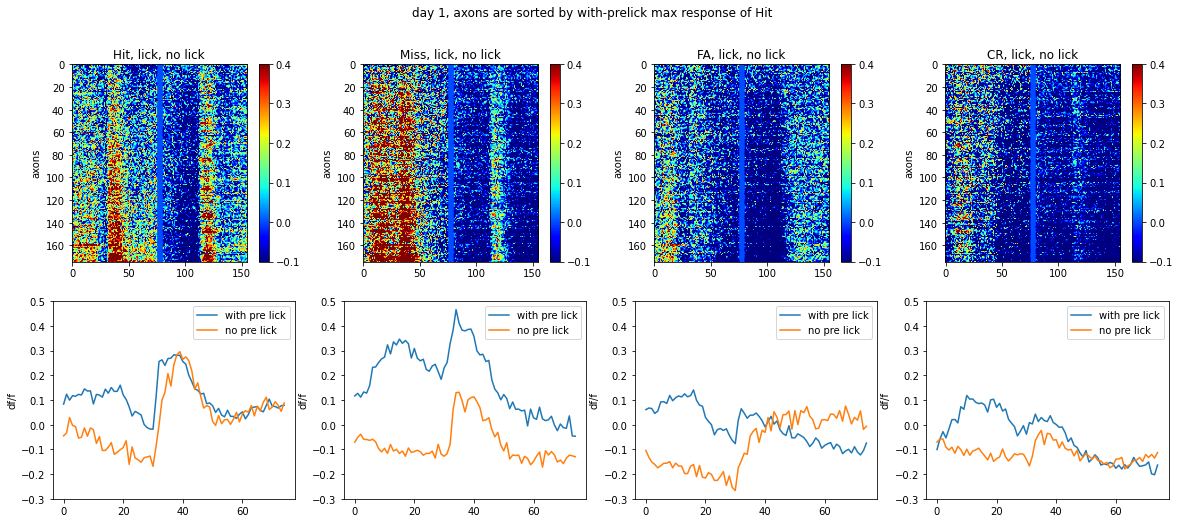

In [5]:
from utils import daily_blocks, block_stim_evoke_response
day = 1
iblocks = daily_blocks(data, day)
if len(iblocks)>0:
    daily_cues = []
    daily_outcomes = []
    daily_responses = []
    daily_firstlicks = []
    daily_alllicks = []
    for i in iblocks:
        block = data[0, i]
        # normalize doesn't have much effect on the result, so set it to False
        cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False)
        daily_cues.append(cues)
        daily_outcomes.append(outcomes)
        daily_responses.append(stim_resp)
        daily_firstlicks.append(firstlicks)
        daily_alllicks.append(alllicks)

    daily_cues = np.hstack(daily_cues)
    daily_outcomes = np.hstack(daily_outcomes)
    daily_responses = np.vstack(daily_responses)
    daily_firstlicks = np.hstack(daily_firstlicks)
    daily_alllicks = np.vstack(daily_alllicks)

    NN = daily_responses.shape[1]

    outcome_index = 1
    plt.figure(figsize=(20,8))
    for outcome_index in range(1,5):
        all_resp = np.zeros((NN, 75*2+5))
        ioutcome = np.where(daily_outcomes == outcome_index)[0]
        oresp = daily_responses[ioutcome]

        lick = daily_alllicks[ioutcome] 
        n_prelicks = np.sum(lick[:, :15], axis=1)
        lick_idx = np.where(n_prelicks != 0)[0] # with prelick
        resp = oresp[lick_idx]
        resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
        if outcome_index==1:
            isort = np.argsort(resp[:, 30:].sum(axis=1)) # sort by max response in Hit trials with prelick
        all_resp[:, :75] = resp[isort]

        nolick_idx = np.where(n_prelicks == 0)[0] # without prelick
        resp = oresp[nolick_idx]
        resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
        all_resp[:, (75+5):] = resp[isort]

        plt.subplot(2,4,outcome_index)
        x = np.arange(NT)
        plt.imshow(all_resp, cmap='jet', vmin=-0.1, vmax=0.4)
        plt.ylabel('axons')
        plt.colorbar()
        # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
        plt.title('{}, lick, no lick'.format(outcome_list[outcome_index-1]))
        plt.subplot(2,4,4+outcome_index)

        resp_lick = oresp[lick_idx].reshape(-1, NT)
        resp_lick = np.mean(resp_lick, axis=0)
        resp_nolick = resp[nolick_idx].reshape(-1, NT)
        resp_nolick = np.mean(resp_nolick, axis=0)

        x = np.arange(NT)
        plt.plot(x, resp_lick, label='with pre lick')
        plt.plot(x, resp_nolick, label='no pre lick')
        plt.ylim([-0.3, 0.5]) # with zscore
        # without zscore
        # plt.ylim([-0.1, 0.15])
        plt.legend()
        plt.ylabel('df/f')
    plt.suptitle('day {}, axons are sorted by with-prelick max response of Hit'.format(day))
    plt.show()
    # fig_save_path = os.path.join('figures',  'stim-evoke-response-sort-by-hit-prelickornot_{}_day-{}'.format(mouse_name, day))
    # plt.savefig(fig_save_path, dpi=100)
    # plt.close()

C:\Users\fdu5\AppData\Local\Temp\75/ipykernel_58720/4089553556.py:39: RuntimeWarning: Mean of empty slice.
  resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


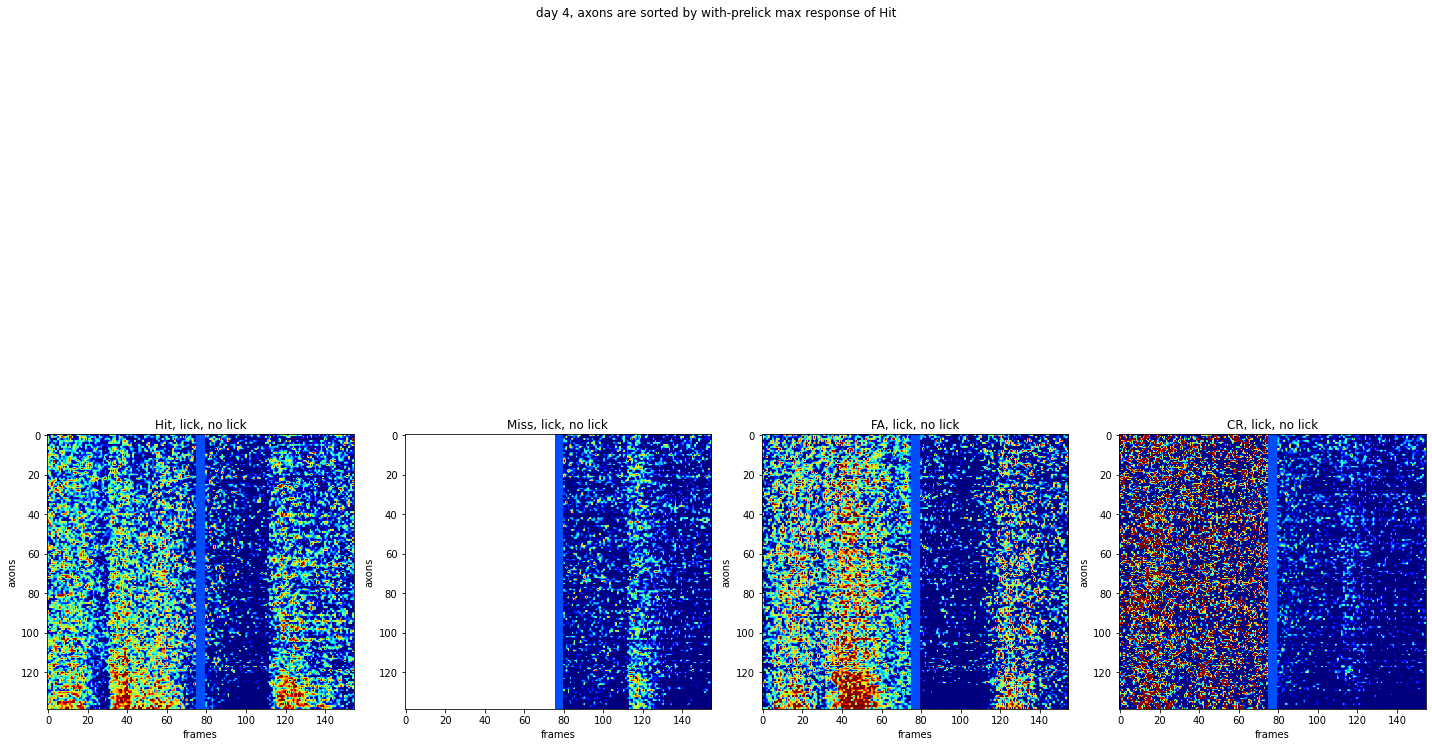

In [6]:
from utils import daily_blocks, block_stim_evoke_response
day = 4
iblocks = daily_blocks(data, day)
if len(iblocks)>0:
    daily_cues = []
    daily_outcomes = []
    daily_responses = []
    daily_firstlicks = []
    daily_alllicks = []
    for i in iblocks:
        block = data[0, i]
        # normalize doesn't have much effect on the result, so set it to False
        cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False)
        daily_cues.append(cues)
        daily_outcomes.append(outcomes)
        daily_responses.append(stim_resp)
        daily_firstlicks.append(firstlicks)
        daily_alllicks.append(alllicks)

    daily_cues = np.hstack(daily_cues)
    daily_outcomes = np.hstack(daily_outcomes)
    daily_responses = np.vstack(daily_responses)
    daily_firstlicks = np.hstack(daily_firstlicks)
    daily_alllicks = np.vstack(daily_alllicks)

    NN = daily_responses.shape[1]

    outcome_index = 1
    plt.figure(figsize=(20,16))
    for outcome_index in range(1,5):
        all_resp = np.zeros((NN, 75*2+5))
        ioutcome = np.where(daily_outcomes == outcome_index)[0]
        oresp = daily_responses[ioutcome]

        lick = daily_alllicks[ioutcome] 
        n_prelicks = np.sum(lick[:, :15], axis=1)
        lick_idx = np.where(n_prelicks != 0)[0] # with prelick
        resp = oresp[lick_idx]
        resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
        if outcome_index==1:
            isort = np.argsort(resp[:, 30:].sum(axis=1)) # sort by max response in Hit trials with prelick
        all_resp[:, :75] = resp[isort]

        nolick_idx = np.where(n_prelicks == 0)[0] # without prelick
        resp = oresp[nolick_idx]
        resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
        all_resp[:, (75+5):] = resp[isort]

        plt.subplot(1,4,outcome_index)
        x = np.arange(NT)
        plt.imshow(all_resp, cmap='jet', vmin=-0.1, vmax=0.4)
        plt.ylabel('axons')
        plt.xlabel('frames')
        # plt.colorbar()
        # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
        plt.title('{}, lick, no lick'.format(outcome_list[outcome_index-1]))
    plt.suptitle('day {}, axons are sorted by with-prelick max response of Hit'.format(day))
    plt.tight_layout()
    plt.show()
    # fig_save_path = os.path.join('figures',  'stim-evoke-response-sort-by-hit-prelickornot_{}_day-{}'.format(mouse_name, day))
    # plt.savefig(fig_save_path, dpi=100)
    # plt.close()

### all

In [ ]:
from utils import daily_blocks, block_stim_evoke_response
day = 1
for day in range(1, nDays+1):
    iblocks = daily_blocks(data, day)
    if len(iblocks)>0:
        daily_cues = []
        daily_outcomes = []
        daily_responses = []
        daily_firstlicks = []
        daily_alllicks = []
        for i in iblocks:
            block = data[0, i]
            # normalize doesn't have much effect on the result, so set it to False
            cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False)
            daily_cues.append(cues)
            daily_outcomes.append(outcomes)
            daily_responses.append(stim_resp)
            daily_firstlicks.append(firstlicks)
            daily_alllicks.append(alllicks)

        daily_cues = np.hstack(daily_cues)
        daily_outcomes = np.hstack(daily_outcomes)
        daily_responses = np.vstack(daily_responses)
        daily_firstlicks = np.hstack(daily_firstlicks)
        daily_alllicks = np.vstack(daily_alllicks)

        NN = daily_responses.shape[1]

        outcome_index = 1
        plt.figure(figsize=(20,8))
        for outcome_index in range(1,5):
            all_resp = np.zeros((NN, 75*2+5))
            ioutcome = np.where(daily_outcomes == outcome_index)[0]
            oresp = daily_responses[ioutcome]

            lick = daily_alllicks[ioutcome] 
            n_prelicks = np.sum(lick[:, :15], axis=1)
            lick_idx = np.where(n_prelicks != 0)[0] # with prelick
            resp = oresp[lick_idx]
            resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
            if outcome_index==1:
                isort = np.argsort(resp[:, 30:].sum(axis=1)) # sort by max response in Hit trials with prelick
            all_resp[:, :75] = resp[isort]

            nolick_idx = np.where(n_prelicks == 0)[0] # without prelick
            resp = oresp[nolick_idx]
            resp = resp.mean(axis=0) # average response of each axon in one day for a outcome. -> (NN, 75)
            all_resp[:, (75+5):] = resp[isort]

            plt.subplot(2,4,outcome_index)
            x = np.arange(NT)
            plt.imshow(all_resp, cmap='jet', vmin=-0.1, vmax=0.4)
            plt.ylabel('axons')
            plt.colorbar()
            # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
            plt.title('{}, lick, no lick'.format(outcome_list[outcome_index-1]))
            plt.subplot(2,4,4+outcome_index)

            resp_lick = oresp[lick_idx].reshape(-1, NT)
            resp_lick = np.mean(resp_lick, axis=0)
            resp_nolick = resp[nolick_idx].reshape(-1, NT)
            resp_nolick = np.mean(resp_nolick, axis=0)

            x = np.arange(NT)
            plt.plot(x, resp_lick, label='with pre lick')
            plt.plot(x, resp_nolick, label='no pre lick')
            plt.ylim([-0.3, 0.5]) # with zscore
            # without zscore
            # plt.ylim([-0.1, 0.15])
            plt.legend()
            plt.ylabel('df/f')
        plt.suptitle('day {}, axons are sorted by with-prelick max response of Hit'.format(day))
        fig_save_path = os.path.join('figures',  'stim-evoke-response-sort-by-hit-prelickornot_{}_day-{}'.format(mouse_name, day))
        plt.savefig(fig_save_path, dpi=100)
        plt.close()

# zscore response across days

In [77]:
valid_days = []
for day in range(1, nDays+1):
    iblocks = daily_blocks(data, day)
    if len(iblocks)>0:
        valid_days.append(day)

In [78]:
NT = 75
with_prelick = np.zeros((4, len(valid_days), NT))
no_prelick = np.zeros((4, len(valid_days), NT))

for iday, day in enumerate(valid_days):
    iblocks = daily_blocks(data, day)
    daily_cues = []
    daily_outcomes = []
    daily_responses = []
    daily_firstlicks = []
    daily_alllicks = []
    for i in iblocks:
        block = data[0, i]
        # normalize doesn't have much effect on the result, so set it to False
        cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False)
        daily_cues.append(cues)
        daily_outcomes.append(outcomes)
        daily_responses.append(stim_resp)
        daily_firstlicks.append(firstlicks)
        daily_alllicks.append(alllicks)

    daily_cues = np.hstack(daily_cues)
    daily_outcomes = np.hstack(daily_outcomes)
    daily_responses = np.vstack(daily_responses)
    daily_firstlicks = np.hstack(daily_firstlicks)
    daily_alllicks = np.vstack(daily_alllicks)

    NN = daily_responses.shape[1]

    # from scipy.stats import pearsonr
    daily_spks = daily_responses.transpose(1, 0, 2)
    daily_spks = daily_spks.reshape(NN, -1)
    avg_resp = np.mean(daily_spks, axis=0) # ntrials x 75
    for outcome_index in range(1,5):
        # hit responses
        ioutcome = np.where(daily_outcomes == outcome_index)[0]
        resp = daily_responses[ioutcome]
        NT = resp.shape[-1]
        lick = daily_alllicks[ioutcome]
        n_prelicks = np.sum(lick[:, :15], axis=1)
        lick_idx = np.where(n_prelicks != 0)[0]
        resp_lick = resp[lick_idx].reshape(-1, NT)
        resp_lick = np.mean(resp_lick, axis=0)
        nolick_idx = np.where(n_prelicks == 0)[0]
        resp_nolick = resp[nolick_idx].reshape(-1, NT)
        resp_nolick = np.mean(resp_nolick, axis=0)
        lick_sort = np.argsort(n_prelicks)
        lick = lick[lick_sort]

        resp = resp.reshape(-1, NT)
        all_resp = np.mean(resp, axis=0)
        
        
        with_prelick[outcome_index-1, iday] = resp_lick
        no_prelick[outcome_index-1, iday] = resp_nolick

e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


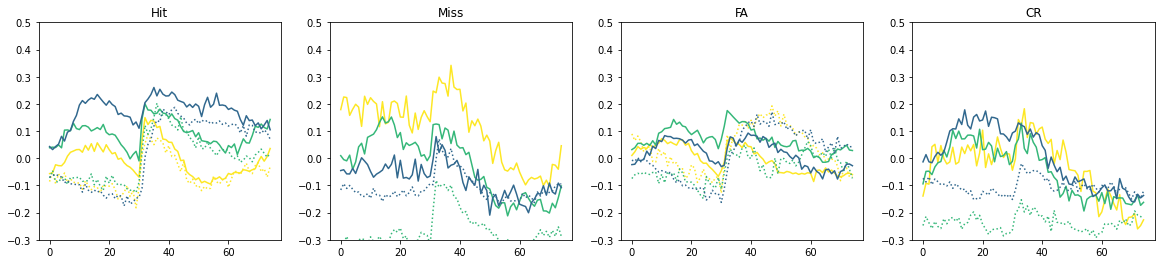

In [79]:
x = np.arange(NT)
cmap = plt.cm.get_cmap('viridis_r')
plt.figure(figsize=(20,4))
for i in range(4):
    plt.subplot(1, 4 ,i+1)
    label = outcome_list[i]
    plt.title(label)
    for iday, day in enumerate(valid_days):
        plt.plot(x, with_prelick[i, iday], label='day {}'.format(day), color=cmap(iday/len(valid_days)))
        plt.plot(x, no_prelick[i, iday], label='day {}'.format(day), color=cmap(iday/len(valid_days)), linestyle=':')
        plt.ylim([-0.3, 0.5])

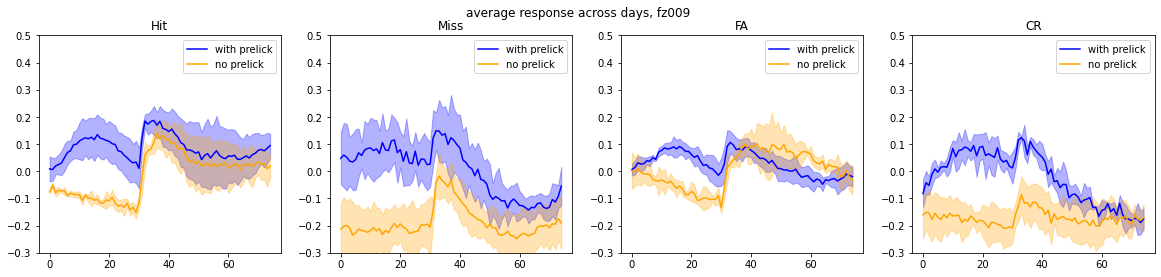

In [80]:
x = np.arange(NT)
plt.figure(figsize=(20,4))
for i in range(4):
    plt.subplot(1, 4 ,i+1)
    label = outcome_list[i]
    plt.title(label)
    # remove nan
    o_with_prelick = with_prelick[i]
    o_with_prelick = o_with_prelick[~np.isnan(o_with_prelick).any(axis=1)]
    o_no_prelick = no_prelick[i]
    o_no_prelick = o_no_prelick[~np.isnan(o_no_prelick).any(axis=1)]
    with_prelick_mu = np.mean(o_with_prelick, axis=0)
    with_prelick_std = np.std(o_with_prelick, axis=0)
    no_prelick_mu = np.mean(o_no_prelick, axis=0)
    no_prelick_std = np.std(o_no_prelick, axis=0)
    plt.plot(x, with_prelick_mu, label='with prelick', color='blue')
    plt.fill_between(x, with_prelick_mu-with_prelick_std,with_prelick_mu+with_prelick_std, color='blue', alpha=0.3)
    plt.plot(x, no_prelick_mu, label='no prelick',color='orange' )
    plt.fill_between(x, no_prelick_mu-no_prelick_std,no_prelick_mu+no_prelick_std, color='orange', alpha=0.3)
    plt.legend()
    plt.suptitle('average response across days, {}'.format(mouse_name))
    plt.ylim([-0.3, 0.5])

# axon raster before Miss with Miss/CR preceding

In [9]:
# find Miss-Miss, CR-Miss Pairs
from scipy.stats import zscore
def block_pair_response(block, pair=[1, 1], remove=False):
    '''
    return responses of a pair of outcome
    pair: a list with two values, first value for pre-outcome, second value for post-outcome. 
    1-4: Hit, Miss, FA, CR
    '''
    raw_spks = block['imagingdata']
    NA, NT = raw_spks.shape
    spks = zscore(raw_spks, axis=1)

    behavior = block['behavdata']
    istim = np.where(behavior[0] > 0)[0] # cue onset frames
    cues = behavior[0, istim]
    outcomes = behavior[1, istim]
    ifirstlicks = -np.ones(len(istim))
    licks = behavior[3]

    all_df = []
    all_licks = []
    if remove:
        nonlick_flag = (outcomes == 4) | (outcomes == 2) # CR and Miss
        remove_flag = np.ones(nonlick_flag.shape)
        for i in range(20, len(nonlick_flag)):
            if np.sum(nonlick_flag[(i-20):i]) == 20:
                remove_flag[(i-20):i] = 0
        remove_flag = (remove_flag == 1)
        outcomes = outcomes[remove_flag]
        cues = cues[remove_flag]
        ifirstlicks = ifirstlicks[remove_flag]
        istim = istim[remove_flag]
        print('remove {}/{} trials with window size 20'.format(len(nonlick_flag) - np.sum(remove_flag), len(nonlick_flag)))
    # use zscore
    for i,k in enumerate(istim[:-1]):
        outcome_pair = [outcomes[i], outcomes[i+1]]
        pre_range = range((k - 30), (k+45))
        post_range = range((istim[i+1] - 30), (istim[i+1] + 45))
        if outcome_pair == pair:
            all_df.append(np.hstack([spks[:, pre_range], spks[:, post_range]]))
            all_licks.append(np.hstack([licks[pre_range], licks[post_range]]))
            # all_licks.append(licks[post_range])
    if len(all_df) > 0:
        all_df = np.stack(all_df)
        all_licks = np.stack(all_licks)
    return outcomes, all_df, all_licks

remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
remove 34/100 trials with window size 20


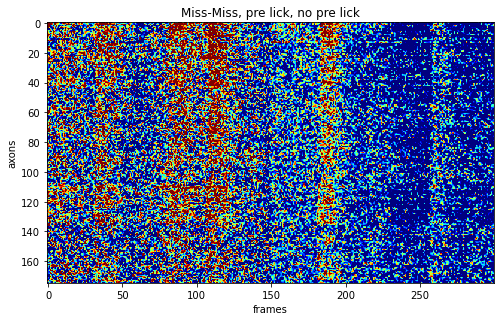

In [10]:
from utils import daily_blocks, block_stim_evoke_response
day = 1
iblocks = daily_blocks(data, day)
pair = [2,2]
if len(iblocks)>0:
    daily_cues = []
    daily_outcomes = []
    daily_responses = []
    daily_alllicks = []
    for i in iblocks:
        block = data[0, i]
        # normalize doesn't have much effect on the result, so set it to False
        outcomes, stim_resp, alllicks = block_pair_response(block, pair, remove=True)
        daily_outcomes.append(outcomes)
        daily_responses.append(stim_resp)
        daily_alllicks.append(alllicks)
    
    daily_outcomes = np.hstack(daily_outcomes)
    daily_responses = np.vstack(daily_responses)
    daily_alllicks = np.vstack(daily_alllicks)
    if daily_responses.shape[1] > 0:
        n_prelicks = np.sum(daily_alllicks[:, 75:90], axis=1)
        lick_idx = np.where(n_prelicks != 0)[0]
        nolick_idx = np.where(n_prelicks == 0)[0]
        NN = daily_responses.shape[1]
        N_pair = daily_responses.shape[0]
        plt.figure(figsize=(8, 8))
        lick_avg_resp = np.mean(daily_responses[lick_idx], axis=0)
        nolick_avg_resp = np.mean(daily_responses[nolick_idx], axis=0)
        avg_resp = np.hstack([lick_avg_resp, nolick_avg_resp])
        plt.imshow(avg_resp, cmap='jet', vmin=-0.1, vmax=0.4)
        plt.ylabel('axons')
        plt.xlabel('frames')
        plt.title('{}-{}, pre lick, no pre lick'.format(outcome_list[pair[0]-1], outcome_list[pair[1]-1]))
    else:
        print('no such pair in day {}'.format(day), pair)

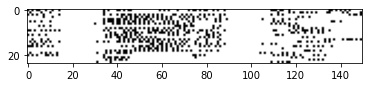

In [79]:
plt.imshow(daily_alllicks, cmap='binary')

remove 0/100 trials with window size 20
remove 0/100 trials with window size 20
remove 34/100 trials with window size 20


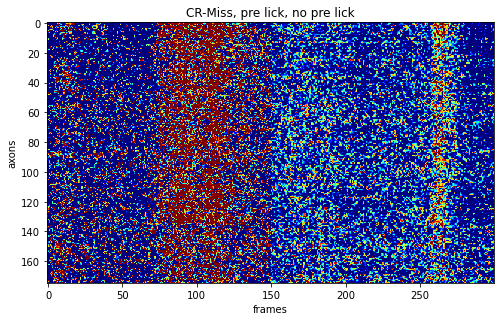

In [11]:
from utils import daily_blocks, block_stim_evoke_response
day = 1
iblocks = daily_blocks(data, day)
pair = [4,2]
if len(iblocks)>0:
    daily_cues = []
    daily_outcomes = []
    daily_responses = []
    daily_alllicks = []
    for i in iblocks:
        block = data[0, i]
        # normalize doesn't have much effect on the result, so set it to False
        outcomes, stim_resp, alllicks = block_pair_response(block, pair, remove=True)
        if len(stim_resp) > 0:
            daily_outcomes.append(outcomes)
            daily_responses.append(stim_resp)
            daily_alllicks.append(alllicks)
    
    daily_outcomes = np.hstack(daily_outcomes)
    daily_responses = np.vstack(daily_responses)
    daily_alllicks = np.vstack(daily_alllicks)
    if daily_responses.shape[1] > 0:
        n_prelicks = np.sum(daily_alllicks[:, 75:90], axis=1)
        lick_idx = np.where(n_prelicks != 0)[0]
        nolick_idx = np.where(n_prelicks == 0)[0]
        NN = daily_responses.shape[1]
        N_pair = daily_responses.shape[0]
        plt.figure(figsize=(8, 8))
        lick_avg_resp = np.mean(daily_responses[lick_idx], axis=0)
        nolick_avg_resp = np.mean(daily_responses[nolick_idx], axis=0)
        avg_resp = np.hstack([lick_avg_resp, nolick_avg_resp])
        plt.imshow(avg_resp, cmap='jet', vmin=-0.1, vmax=0.4)
        plt.ylabel('axons')
        plt.xlabel('frames')
        plt.title('{}-{}, pre lick, no pre lick'.format(outcome_list[pair[0]-1], outcome_list[pair[1]-1]))
    else:
        print('no such pair in day {}'.format(day), pair)

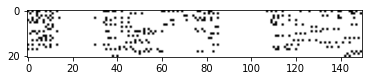

In [85]:
plt.imshow(daily_alllicks, cmap='binary')

# avg response with different pair

(10044, 75)


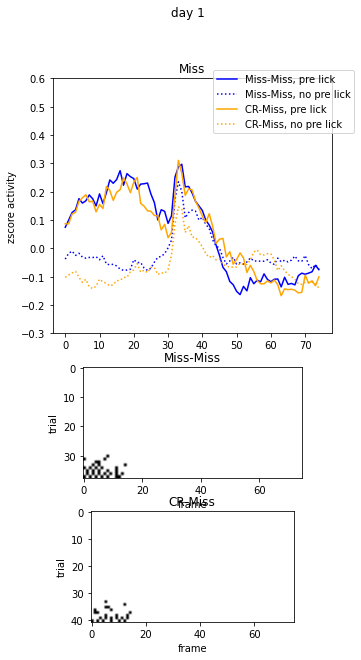

In [23]:

day = 1
iblocks = daily_blocks(data, day)

if len(iblocks)>0:
    daily_cues = []
    daily_outcomes = []
    daily_responses = []
    daily_firstlicks = []
    daily_alllicks = []
    for i in iblocks:
        block = data[0, i]
        # normalize doesn't have much effect on the result, so set it to False
        cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False)
        daily_cues.append(cues)
        daily_outcomes.append(outcomes)
        daily_responses.append(stim_resp)
        daily_firstlicks.append(firstlicks)
        daily_alllicks.append(alllicks)

    daily_cues = np.hstack(daily_cues)
    daily_outcomes = np.hstack(daily_outcomes)
    daily_responses = np.vstack(daily_responses)
    daily_firstlicks = np.hstack(daily_firstlicks)
    daily_alllicks = np.vstack(daily_alllicks)

    NN = daily_responses.shape[1]

    # from scipy.stats import pearsonr
    daily_spks = daily_responses.transpose(1, 0, 2)
    daily_spks = daily_spks.reshape(NN, -1)
    avg_resp = np.mean(daily_spks, axis=0) # ntrials x 75
    outcome_index = 2
    # for outcome_index in range(1,5):
    ioutcome = np.where(daily_outcomes == outcome_index)[0]
    if ioutcome[0] == 0:
        ioutcome = ioutcome[1:]
    pre_outcome = daily_outcomes[ioutcome-1]
    allresp = daily_responses[ioutcome] 
    NT = resp.shape[-1]
    print(resp.shape)

    alllick = daily_alllicks[ioutcome]
    isame = np.where(pre_outcome == outcome_index)[0]
    idiff = np.where(pre_outcome == 4)[0]
    
    lick = alllick[isame]
    resp = allresp[isame]
    n_prelicks = np.sum(lick[:, :15], axis=1)
    lick_idx = np.where(n_prelicks != 0)[0]
    resp_lick = resp[lick_idx].reshape(-1, NT)
    resp_lick = np.mean(resp_lick, axis=0)
    nolick_idx = np.where(n_prelicks == 0)[0]
    resp_nolick = resp[nolick_idx].reshape(-1, NT)
    resp_nolick = np.mean(resp_nolick, axis=0)
    lick_sort = np.argsort(n_prelicks)
    same_lick = lick[lick_sort]
    same_resp_lick = resp_lick.copy()
    same_resp_nolick = resp_nolick.copy()
    
    lick = alllick[idiff]
    resp = allresp[idiff]
    n_prelicks = np.sum(lick[:, :15], axis=1)
    lick_idx = np.where(n_prelicks != 0)[0]
    resp_lick = resp[lick_idx].reshape(-1, NT)
    resp_lick = np.mean(resp_lick, axis=0)
    nolick_idx = np.where(n_prelicks == 0)[0]
    resp_nolick = resp[nolick_idx].reshape(-1, NT)
    resp_nolick = np.mean(resp_nolick, axis=0)
    lick_sort = np.argsort(n_prelicks)
    diff_lick = lick[lick_sort]
    diff_resp_lick = resp_lick.copy()
    diff_resp_nolick = resp_nolick.copy()

    plt.figure(figsize=(5, 10))
    grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.3)
    plt.subplot(grid[:2, 0])
    # plt.subplot(1, 3,1)
    x = np.arange(NT)
    plt.plot(x, same_resp_lick, label='Miss-Miss, pre lick', color='blue')
    plt.plot(x, same_resp_nolick, label='Miss-Miss, no pre lick', color='blue', linestyle=':')
    plt.plot(x, diff_resp_lick, label='CR-Miss, pre lick', color='orange')
    plt.plot(x, diff_resp_nolick, label='CR-Miss, no pre lick', color='orange', linestyle=':')
    plt.ylim([-0.3, 0.6])
    # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
    plt.title(outcome_list[outcome_index-1])
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.ylabel('zscore activity')
    # plt.subplot(1, 3,2)
    plt.subplot(grid[2, 0])
    plt.imshow(same_lick, cmap='binary')
    plt.xlabel('frame')
    plt.ylabel('trial')
    plt.title('Miss-Miss')
    # plt.subplot(1, 3,3)
    plt.subplot(grid[3, 0])
    plt.imshow(diff_lick, cmap='binary')
    plt.xlabel('frame')
    plt.ylabel('trial')
    plt.title('CR-Miss')
    plt.suptitle('day {}'.format(day))
    plt.show()

(19, 205, 75)


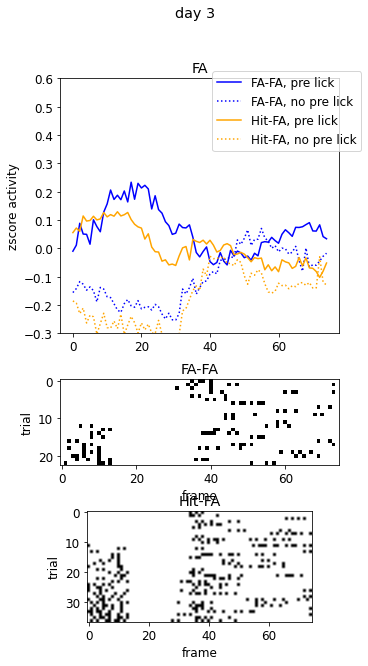

In [282]:

day = 3
iblocks = daily_blocks(data, day)

if len(iblocks)>0:
    daily_cues = []
    daily_outcomes = []
    daily_responses = []
    daily_firstlicks = []
    daily_alllicks = []
    for i in iblocks:
        block = data[0, i]
        # normalize doesn't have much effect on the result, so set it to False
        cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False)
        daily_cues.append(cues)
        daily_outcomes.append(outcomes)
        daily_responses.append(stim_resp)
        daily_firstlicks.append(firstlicks)
        daily_alllicks.append(alllicks)

    daily_cues = np.hstack(daily_cues)
    daily_outcomes = np.hstack(daily_outcomes)
    daily_responses = np.vstack(daily_responses)
    daily_firstlicks = np.hstack(daily_firstlicks)
    daily_alllicks = np.vstack(daily_alllicks)

    NN = daily_responses.shape[1]

    # from scipy.stats import pearsonr
    daily_spks = daily_responses.transpose(1, 0, 2)
    daily_spks = daily_spks.reshape(NN, -1)
    avg_resp = np.mean(daily_spks, axis=0) # ntrials x 75
    outcome_index = 3
    # for outcome_index in range(1,5):
    ioutcome = np.where(daily_outcomes == outcome_index)[0]
    if ioutcome[0] == 0:
        ioutcome = ioutcome[1:]
    pre_outcome = daily_outcomes[ioutcome-1]
    allresp = daily_responses[ioutcome] 
    NT = resp.shape[-1]
    print(resp.shape)

    alllick = daily_alllicks[ioutcome]
    isame = np.where(pre_outcome == outcome_index)[0]
    idiff = np.where(pre_outcome == 1)[0]
    
    lick = alllick[isame]
    resp = allresp[isame]
    n_prelicks = np.sum(lick[:, :15], axis=1)
    lick_idx = np.where(n_prelicks != 0)[0]
    resp_lick = resp[lick_idx].reshape(-1, NT)
    resp_lick = np.mean(resp_lick, axis=0)
    nolick_idx = np.where(n_prelicks == 0)[0]
    resp_nolick = resp[nolick_idx].reshape(-1, NT)
    resp_nolick = np.mean(resp_nolick, axis=0)
    lick_sort = np.argsort(n_prelicks)
    same_lick = lick[lick_sort]
    same_resp_lick = resp_lick.copy()
    same_resp_nolick = resp_nolick.copy()
    
    lick = alllick[idiff]
    resp = allresp[idiff]
    n_prelicks = np.sum(lick[:, :15], axis=1)
    lick_idx = np.where(n_prelicks != 0)[0]
    resp_lick = resp[lick_idx].reshape(-1, NT)
    resp_lick = np.mean(resp_lick, axis=0)
    nolick_idx = np.where(n_prelicks == 0)[0]
    resp_nolick = resp[nolick_idx].reshape(-1, NT)
    resp_nolick = np.mean(resp_nolick, axis=0)
    lick_sort = np.argsort(n_prelicks)
    diff_lick = lick[lick_sort]
    diff_resp_lick = resp_lick.copy()
    diff_resp_nolick = resp_nolick.copy()

    plt.figure(figsize=(5, 10))
    grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.3)
    plt.subplot(grid[:2, 0])
    # plt.subplot(1, 3,1)
    x = np.arange(NT)
    plt.plot(x, same_resp_lick, label='FA-FA, pre lick', color='blue')
    plt.plot(x, same_resp_nolick, label='FA-FA, no pre lick', color='blue', linestyle=':')
    plt.plot(x, diff_resp_lick, label='Hit-FA, pre lick', color='orange')
    plt.plot(x, diff_resp_nolick, label='Hit-FA, no pre lick', color='orange', linestyle=':')
    plt.ylim([-0.3, 0.6])
    # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
    plt.title(outcome_list[outcome_index-1])
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.ylabel('zscore activity')
    # plt.subplot(1, 3,2)
    plt.subplot(grid[2, 0])
    plt.imshow(same_lick, cmap='binary')
    plt.xlabel('frame')
    plt.ylabel('trial')
    plt.title('FA-FA')
    # plt.subplot(1, 3,3)
    plt.subplot(grid[3, 0])
    plt.imshow(diff_lick, cmap='binary')
    plt.xlabel('frame')
    plt.ylabel('trial')
    plt.title('Hit-FA')
    plt.suptitle('day {}'.format(day))
    plt.show()

## all

In [286]:
for day in range(1, nDays+1):
    iblocks = daily_blocks(data, day)

    if len(iblocks)>0:
        daily_cues = []
        daily_outcomes = []
        daily_responses = []
        daily_firstlicks = []
        daily_alllicks = []
        for i in iblocks:
            block = data[0, i]
            # normalize doesn't have much effect on the result, so set it to False
            cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False)
            daily_cues.append(cues)
            daily_outcomes.append(outcomes)
            daily_responses.append(stim_resp)
            daily_firstlicks.append(firstlicks)
            daily_alllicks.append(alllicks)

        daily_cues = np.hstack(daily_cues)
        daily_outcomes = np.hstack(daily_outcomes)
        daily_responses = np.vstack(daily_responses)
        daily_firstlicks = np.hstack(daily_firstlicks)
        daily_alllicks = np.vstack(daily_alllicks)

        NN = daily_responses.shape[1]

        # from scipy.stats import pearsonr
        daily_spks = daily_responses.transpose(1, 0, 2)
        daily_spks = daily_spks.reshape(NN, -1)
        avg_resp = np.mean(daily_spks, axis=0) # ntrials x 75
        outcome_index = 2
        # for outcome_index in range(1,5):
        ioutcome = np.where(daily_outcomes == outcome_index)[0]
        if ioutcome[0] == 0:
            ioutcome = ioutcome[1:]
        pre_outcome = daily_outcomes[ioutcome-1]
        allresp = daily_responses[ioutcome] 
        NT = resp.shape[-1]
        print(resp.shape)

        alllick = daily_alllicks[ioutcome]
        isame = np.where(pre_outcome == outcome_index)[0]
        idiff = np.where(pre_outcome == 4)[0]

        lick = alllick[isame]
        resp = allresp[isame]
        n_prelicks = np.sum(lick[:, :15], axis=1)
        lick_idx = np.where(n_prelicks != 0)[0]
        resp_lick = resp[lick_idx].reshape(-1, NT)
        resp_lick = np.mean(resp_lick, axis=0)
        nolick_idx = np.where(n_prelicks == 0)[0]
        resp_nolick = resp[nolick_idx].reshape(-1, NT)
        resp_nolick = np.mean(resp_nolick, axis=0)
        lick_sort = np.argsort(n_prelicks)
        same_lick = lick[lick_sort]
        same_resp_lick = resp_lick.copy()
        same_resp_nolick = resp_nolick.copy()

        lick = alllick[idiff]
        resp = allresp[idiff]
        n_prelicks = np.sum(lick[:, :15], axis=1)
        lick_idx = np.where(n_prelicks != 0)[0]
        resp_lick = resp[lick_idx].reshape(-1, NT)
        resp_lick = np.mean(resp_lick, axis=0)
        nolick_idx = np.where(n_prelicks == 0)[0]
        resp_nolick = resp[nolick_idx].reshape(-1, NT)
        resp_nolick = np.mean(resp_nolick, axis=0)
        lick_sort = np.argsort(n_prelicks)
        diff_lick = lick[lick_sort]
        diff_resp_lick = resp_lick.copy()
        diff_resp_nolick = resp_nolick.copy()

        plt.figure(figsize=(5, 10))
        grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.3)
        plt.subplot(grid[:2, 0])
        # plt.subplot(1, 3,1)
        x = np.arange(NT)
        plt.plot(x, same_resp_lick, label='Miss-Miss, pre lick', color='blue')
        plt.plot(x, same_resp_nolick, label='Miss-Miss, no pre lick', color='blue', linestyle=':')
        plt.plot(x, diff_resp_lick, label='CR-Miss, pre lick', color='orange')
        plt.plot(x, diff_resp_nolick, label='CR-Miss, no pre lick', color='orange', linestyle=':')
        plt.ylim([-0.3, 0.6])
        # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
        plt.title(outcome_list[outcome_index-1])
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        plt.ylabel('zscore activity')
        # plt.subplot(1, 3,2)
        plt.subplot(grid[2, 0])
        plt.imshow(same_lick, cmap='binary')
        plt.xlabel('frame')
        plt.ylabel('trial')
        plt.title('Miss-Miss')
        # plt.subplot(1, 3,3)
        plt.subplot(grid[3, 0])
        plt.imshow(diff_lick, cmap='binary')
        plt.xlabel('frame')
        plt.ylabel('trial')
        plt.title('CR-Miss')
        plt.suptitle('day {}, Miss-Miss and CR-Miss activity of Miss trial'.format(day))
        fig_save_path = os.path.join('figures',  'stim-evoke-response-Miss-pairs_{}_day-{}'.format(mouse_name, day))
        plt.savefig(fig_save_path, dpi=100)
        plt.close()

(32, 180, 75)
(41, 447, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(40, 386, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(25, 514, 75)
(37, 313, 75)
(15, 121, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(34, 212, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(40, 321, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(8, 271, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(31, 245, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(18, 405, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(17, 348, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(41, 176, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(35, 76, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(38, 217, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(22, 374, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(10, 298, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(5, 324, 75)
(29, 250, 75)
(13, 236, 75)


In [289]:
for day in range(1, nDays+1):
    iblocks = daily_blocks(data, day)

    if len(iblocks)>0:
        daily_cues = []
        daily_outcomes = []
        daily_responses = []
        daily_firstlicks = []
        daily_alllicks = []
        for i in iblocks:
            block = data[0, i]
            # normalize doesn't have much effect on the result, so set it to False
            cues, outcomes, firstlicks, stim_resp, alllicks = block_stim_evoke_response(block, normalize=True, dff=False)
            daily_cues.append(cues)
            daily_outcomes.append(outcomes)
            daily_responses.append(stim_resp)
            daily_firstlicks.append(firstlicks)
            daily_alllicks.append(alllicks)

        daily_cues = np.hstack(daily_cues)
        daily_outcomes = np.hstack(daily_outcomes)
        daily_responses = np.vstack(daily_responses)
        daily_firstlicks = np.hstack(daily_firstlicks)
        daily_alllicks = np.vstack(daily_alllicks)

        NN = daily_responses.shape[1]

        # from scipy.stats import pearsonr
        daily_spks = daily_responses.transpose(1, 0, 2)
        daily_spks = daily_spks.reshape(NN, -1)
        avg_resp = np.mean(daily_spks, axis=0) # ntrials x 75
        outcome_index = 3
        # for outcome_index in range(1,5):
        ioutcome = np.where(daily_outcomes == outcome_index)[0]
        if len(ioutcome) > 0:
            if ioutcome[0] == 0:
                ioutcome = ioutcome[1:]
            pre_outcome = daily_outcomes[ioutcome-1]
            allresp = daily_responses[ioutcome] 
            NT = resp.shape[-1]
            print(resp.shape)

            alllick = daily_alllicks[ioutcome]
            isame = np.where(pre_outcome == outcome_index)[0]
            idiff = np.where(pre_outcome == 1)[0]

            lick = alllick[isame]
            resp = allresp[isame]
            n_prelicks = np.sum(lick[:, :15], axis=1)
            lick_idx = np.where(n_prelicks != 0)[0]
            resp_lick = resp[lick_idx].reshape(-1, NT)
            resp_lick = np.mean(resp_lick, axis=0)
            nolick_idx = np.where(n_prelicks == 0)[0]
            resp_nolick = resp[nolick_idx].reshape(-1, NT)
            resp_nolick = np.mean(resp_nolick, axis=0)
            lick_sort = np.argsort(n_prelicks)
            same_lick = lick[lick_sort]
            same_resp_lick = resp_lick.copy()
            same_resp_nolick = resp_nolick.copy()

            lick = alllick[idiff]
            resp = allresp[idiff]
            n_prelicks = np.sum(lick[:, :15], axis=1)
            lick_idx = np.where(n_prelicks != 0)[0]
            resp_lick = resp[lick_idx].reshape(-1, NT)
            resp_lick = np.mean(resp_lick, axis=0)
            nolick_idx = np.where(n_prelicks == 0)[0]
            resp_nolick = resp[nolick_idx].reshape(-1, NT)
            resp_nolick = np.mean(resp_nolick, axis=0)
            lick_sort = np.argsort(n_prelicks)
            diff_lick = lick[lick_sort]
            diff_resp_lick = resp_lick.copy()
            diff_resp_nolick = resp_nolick.copy()

            plt.figure(figsize=(5, 10))
            grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.3)
            plt.subplot(grid[:2, 0])
            # plt.subplot(1, 3,1)
            x = np.arange(NT)
            plt.plot(x, same_resp_lick, label='FA-FA, pre lick', color='blue')
            plt.plot(x, same_resp_nolick, label='FA-FA, no pre lick', color='blue', linestyle=':')
            plt.plot(x, diff_resp_lick, label='Hit-FA, pre lick', color='orange')
            plt.plot(x, diff_resp_nolick, label='Hit-FA, no pre lick', color='orange', linestyle=':')
            plt.ylim([-0.3, 0.6])
            # plt.plot(x, all_resp, label='all', color='black', linestyle='--')
            plt.title(outcome_list[outcome_index-1])
            plt.legend(bbox_to_anchor=(1.1, 1.05))
            plt.ylabel('zscore activity')
            # plt.subplot(1, 3,2)
            plt.subplot(grid[2, 0])
            plt.imshow(same_lick, cmap='binary')
            plt.xlabel('frame')
            plt.ylabel('trial')
            plt.title('FA-FA')
            # plt.subplot(1, 3,3)
            plt.subplot(grid[3, 0])
            plt.imshow(diff_lick, cmap='binary')
            plt.xlabel('frame')
            plt.ylabel('trial')
            plt.title('Hit-FA')
            plt.suptitle('day {}, FA-FA and Hit-FA activity of FA trial'.format(day))
            fig_save_path = os.path.join('figures',  'stim-evoke-response-FA-pairs_{}_day-{}'.format(mouse_name, day))
            plt.savefig(fig_save_path, dpi=100)
            plt.close()

(26, 386, 75)
(20, 447, 75)
(26, 386, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(9, 313, 75)
(29, 121, 75)
(17, 212, 75)
(13, 321, 75)
(33, 271, 75)
(20, 245, 75)
(51, 405, 75)
(36, 348, 75)


e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
e:\kishorelab\env\fengtong\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(11, 176, 75)
(47, 76, 75)
(31, 217, 75)
(29, 374, 75)
(82, 298, 75)
(48, 324, 75)
(13, 250, 75)
(43, 236, 75)
